In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/olegoid/predicting_models_NBA_games/codespace-0eb1/data/2019_advanced_plus_totals.csv')
df.shape

(529, 49)

In [72]:
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,OWS,PER,STL%,TOV%,TRB%,TS%,USG%,VORP,WS,WS/48
0,Quincy Acy,PF,28,PHO,10,0,123,4,18,0.222,...,-0.1,2.9,0.4,15.2,11.3,0.379,9.2,-0.2,-0.1,-0.022
1,Jaylen Adams,PG,22,ATL,34,1,428,38,110,0.345,...,-0.1,7.6,1.5,19.7,7.4,0.474,13.5,-0.2,0.1,0.011
2,Steven Adams,C,25,OKC,80,80,2669,481,809,0.595,...,5.1,18.5,2.0,12.6,14.7,0.591,16.4,2.1,9.1,0.163
3,Bam Adebayo,C,21,MIA,82,28,1913,280,486,0.576,...,3.4,17.9,1.8,17.1,16.6,0.623,15.8,1.8,6.8,0.171
4,Deng Adel,SF,21,CLE,19,3,194,11,36,0.306,...,-0.2,2.7,0.3,13.7,5.4,0.424,9.9,-0.3,-0.2,-0.054


In [73]:
df.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '3PAr', 'AST%',
       'BLK%', 'BPM', 'DBPM', 'DRB%', 'DWS', 'FTr', 'OBPM', 'ORB%', 'OWS',
       'PER', 'STL%', 'TOV%', 'TRB%', 'TS%', 'USG%', 'VORP', 'WS', 'WS/48'],
      dtype='object')

In [74]:
# Количество NaN
df.isna().any().sum()

0

In [75]:
# Дубликаты
df.duplicated(df.columns).sum()

0

In [76]:
# Нужно описать физический смысл каждой переменной

In [77]:
# df.dtypes
df['Player'] = df['Player'].astype('str')
df['Pos'] = df['Pos'].astype('str')
df['Tm'] = df['Tm'].astype('str')

# Player - не фича, а id, но пока для обработки сюда тоже засунем
categorical_features = ['Player', 'Pos', 'Tm'] 
numerical_features = [e for e in df.columns if e not in categorical_features]

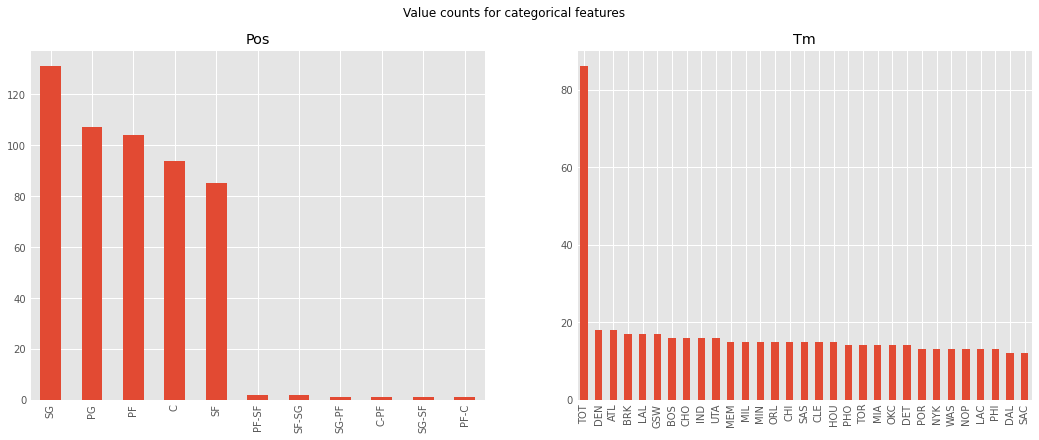

In [79]:
# Для категориальных признаков визуализируем сбалансированность
fig = plt.figure(figsize=(16,6))
fig.suptitle('Value counts for categorical features')

ax = fig.add_subplot(121)
df['Pos'].value_counts().plot(kind='bar', title='Pos');

ax = fig.add_subplot(122)
df['Tm'].value_counts().plot(kind='bar', title='Tm');

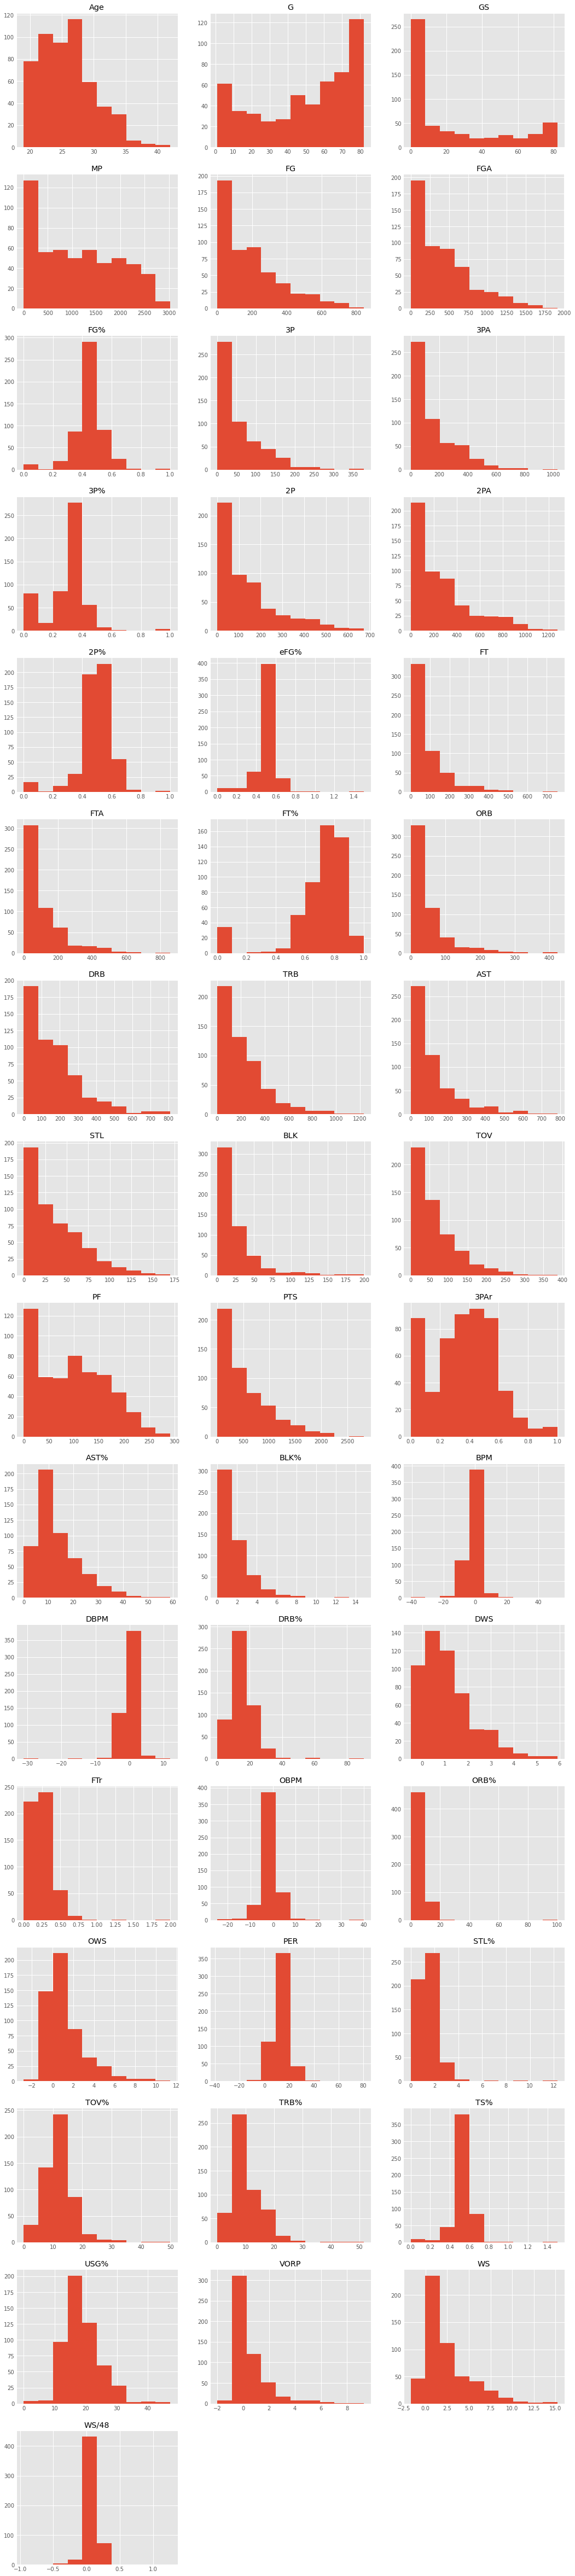

In [82]:
n = len(numerical_features)
n_cols = 3
n_rows = n // n_cols + min(1, n % n_cols)

fig = plt.figure(figsize=(16, 5 * n_rows))
#fig.suptitle('Distributions for numerical variables')

i = 1
for col in numerical_features:
    ax = fig.add_subplot(n_rows, n_cols, i)
    df[col].hist()
    ax.set_title(col)
    i += 1

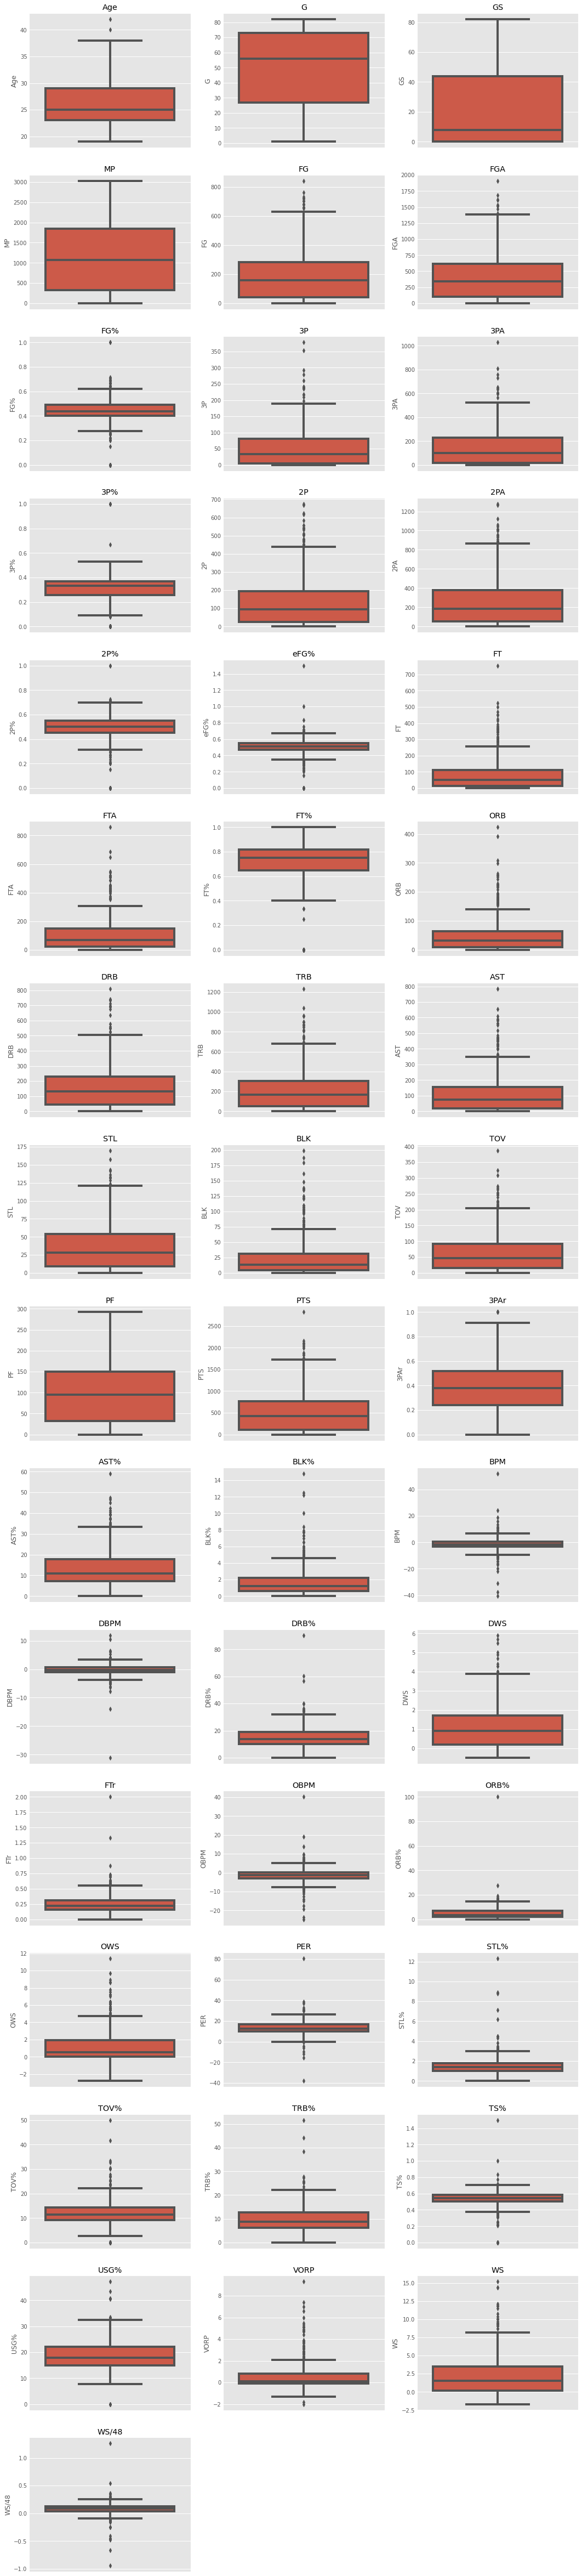

In [85]:
fig = plt.figure(figsize=(16, 5 * n_rows))
#fig.suptitle('Boxplot for numerical variables')

i = 1
for col in numerical_features:
    ax = fig.add_subplot(n_rows, n_cols, i)
    sns.boxplot(y=col, data=df)
    ax.set_title(col)
    i += 1

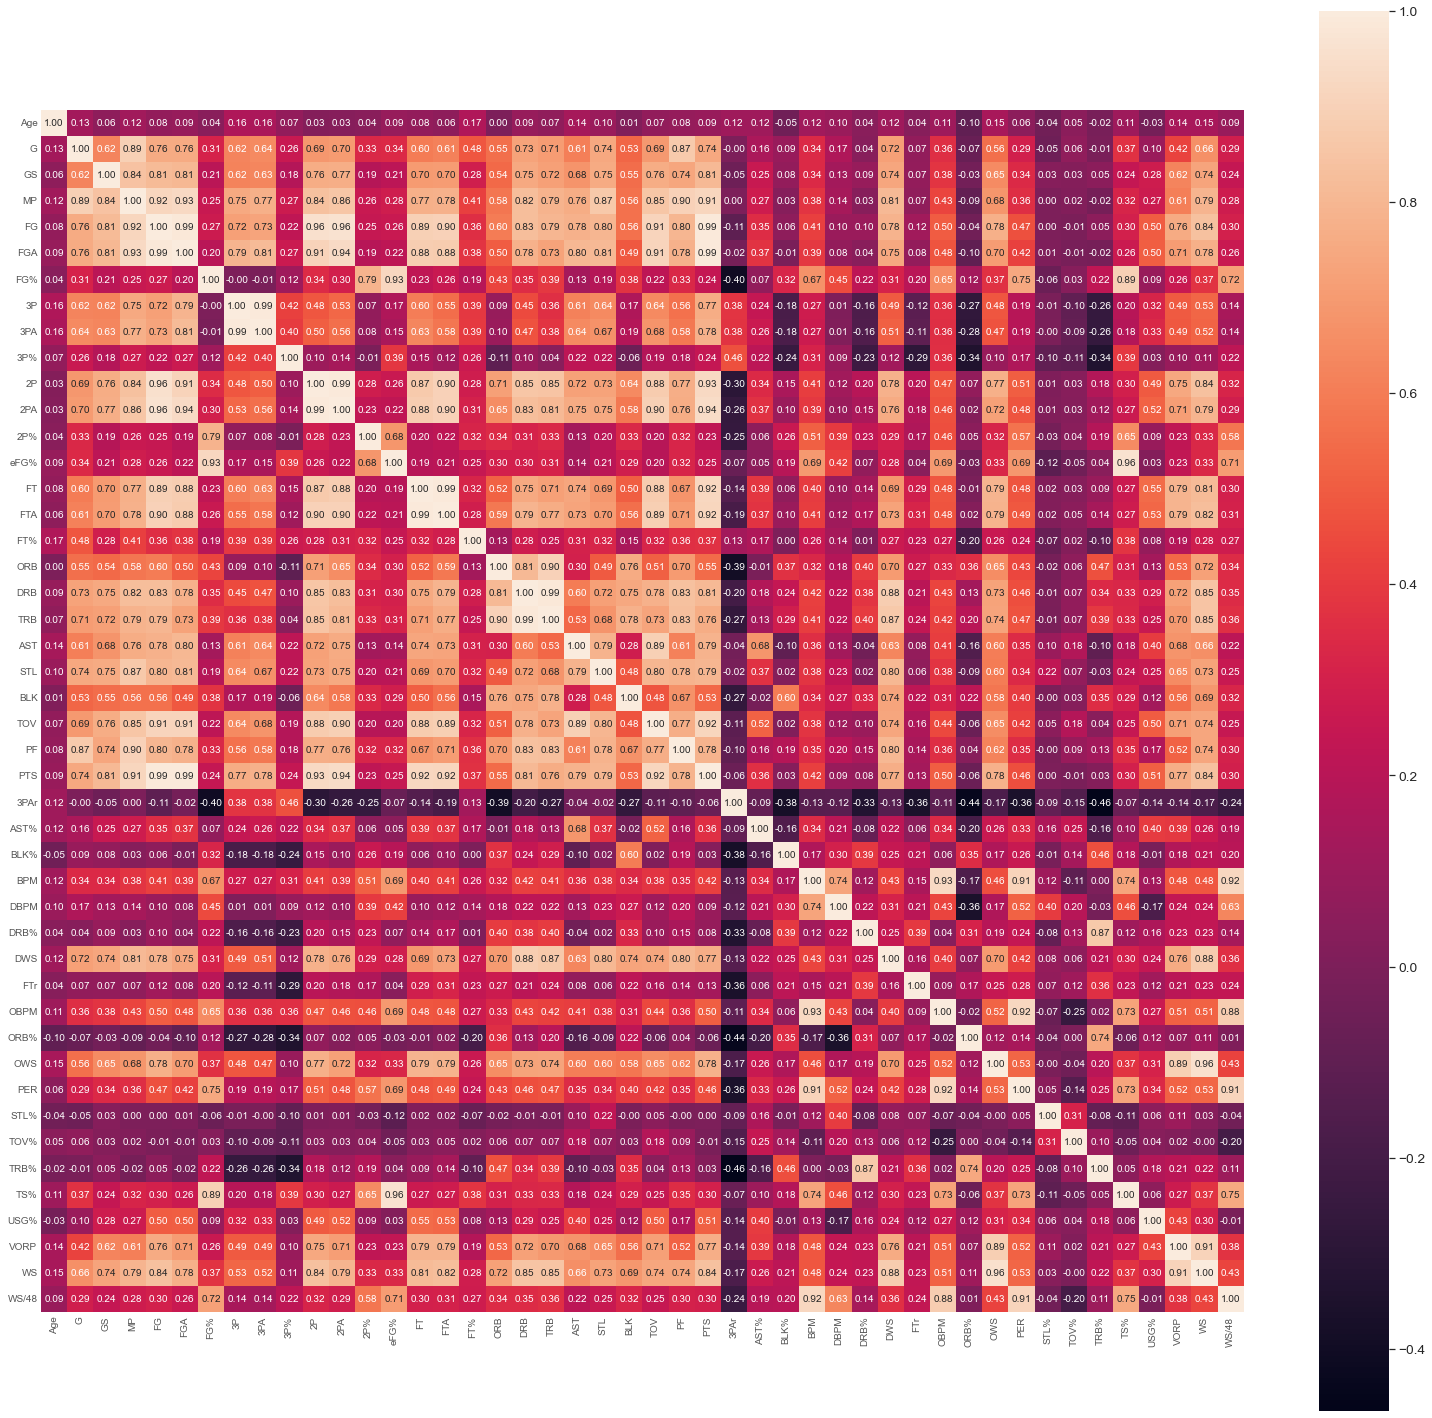

In [88]:
corr_matrix = df[numerical_features].corr()
k = 45
cols = corr_matrix.index
cm = np.corrcoef(df[cols].values.T.astype(float))
plt.subplots(figsize=(24,24));
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Что дальше

1. Выделяем признаки с логнормальным распределением
2. Выявляем причины сильной корреляции между некоторыми признаками
3. Выделяем целевую переменную - вероятно, несколько штук
4. Среди коррелирующих между собой признаков отбираем те, что больше всего коррелируют с целевой переменной
5. Делаем разложение по главным компонентам (PCA) и смотрим, сколько компонент необходимо, чтобы описать подавляющую часть дисперсии